In [1]:
%matplotlib inline 
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from scipy import stats
from scipy.stats import kurtosis 

## 4.2 Interval all the flow rates and categorize 0-25%,25%-50%,50%-75%,75%-100%, and group all the data annually to see if there is shortage or surplus in certain years.

In [2]:
LakeData=pd.read_csv('Lake_Bilancino.csv')
LakeData

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [3]:
LakeData=LakeData.dropna()
LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci
LakeData

<ipython-input-3-022f43b6541c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,totalRainfall
578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,0.0
579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,0.0
580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,0.0
581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,0.2
582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6,0.0
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6,0.0
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6,0.0
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6,0.0


In [5]:
# Returns descriptive statistics on any dataset and weight column.
def descriptive_stats(dataset, weight_column):
    col = dataset[weight_column]
    print('Mean:', np.mean(col))
    print('Median:', np.median(col))
    print('Q1:', np.percentile(col, 25))
    print('Q2:', np.percentile(col, 50))
    print('Q3:', np.percentile(col, 75))
    print('Q4:', np.percentile(col, 100))
    print('Inter-Quartile Range:', np.percentile(col, 75) - np.percentile(col, 25))
    print('Standard Deviation:', np.std(col))
    print('Variance:', np.var(col))
    print('Range:', np.max(col) - np.min(col))
    print('-----------------------------------------')

<AxesSubplot:title={'center':'Histogram of All Lake_Level'}, ylabel='Frequency'>

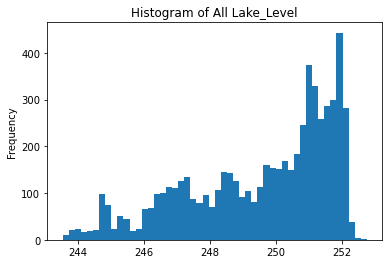

In [6]:
LakeData['Lake_Level'].plot(kind='hist',bins=50, title='Histogram of All Lake_Level')

In [7]:
descriptive_stats(LakeData,'Lake_Level')

Mean: 249.5534721991694
Median: 250.24
Q1: 247.93
Q2: 250.24
Q3: 251.37
Q4: 252.76
Inter-Quartile Range: 3.4399999999999977
Standard Deviation: 2.183152760808995
Variance: 4.766155977027938
Range: 9.22999999999999
-----------------------------------------


<AxesSubplot:title={'center':'Histogram of All Flow_Rate'}, ylabel='Frequency'>

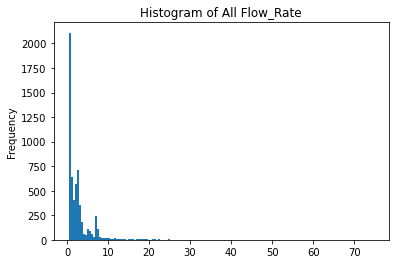

In [8]:
LakeData['Flow_Rate'].plot(kind='hist',bins=150, title='Histogram of All Flow_Rate',xlabel='flow rate')

In [9]:
descriptive_stats(LakeData,'Flow_Rate')

Mean: 2.7782041493776783
Median: 1.5
Q1: 0.6
Q2: 1.5
Q3: 3.0
Q4: 74.65
Inter-Quartile Range: 2.4
Standard Deviation: 4.130833602567077
Variance: 17.063786252097298
Range: 74.2
-----------------------------------------


In [10]:
avg_Lake_Level=np.mean(LakeData['Lake_Level'])
avg_Lake_Level

249.5534721991694

In [11]:
avg_Flow_Rate=np.mean(LakeData['Flow_Rate'])
avg_Flow_Rate

2.7782041493776783

In [12]:
kurtosis(LakeData['Flow_Rate'],fisher=True)

60.385903015041045

In [13]:
num_NRain=0
sum_Flow_Rate_NRain=0

In [14]:
for x,y in zip(LakeData['totalRainfall'],LakeData['Flow_Rate']):
    if(x==0):
        num_NRain+=1
        sum_Flow_Rate_NRain+=y
        

In [15]:
sum_Flow_Rate_NRain
num_NRain
avg_Flow_Rate_NRain= sum_Flow_Rate_NRain/num_NRain
avg_Flow_Rate_NRain

2.2328916470983247

In [16]:
LakeData['dflowRate']=LakeData['Flow_Rate']-avg_Flow_Rate_NRain
LakeData["Date"] = pd.to_datetime(LakeData["Date"])
LakeData["Year"] = pd.DatetimeIndex(LakeData["Date"]).year
LakeData

<ipython-input-16-42c075d3b44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData['dflowRate']=LakeData['Flow_Rate']-avg_Flow_Rate_NRain
<ipython-input-16-42c075d3b44a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData["Date"] = pd.to_datetime(LakeData["Date"])
<ipython-input-16-42c075d3b44a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,totalRainfall,dflowRate,Year
578,2004-02-01,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,0.0,-1.732892,2004
579,2004-03-01,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,0.0,-1.732892,2004
580,2004-04-01,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,0.0,-1.732892,2004
581,2004-05-01,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,0.2,-1.732892,2004
582,2004-06-01,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,0.0,-1.732892,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-06-26,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6,0.0,-1.632892,2020
6599,2020-06-27,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6,0.0,-1.632892,2020
6600,2020-06-28,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6,0.0,-1.632892,2020
6601,2020-06-29,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6,0.0,-1.632892,2020


In [18]:
avg_Flow_Rate_Annually_list=[]
davg_Flow_Rate_Annually_list=[]
davg_Lake_Level_list=[]
sum_RF_Anually_list=[]
time=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
average_LakeL=[]

In [19]:
for x in range(2004,2021):
    LakeDataY=LakeData[~(LakeData['Year']!=x)]
    avg_Flow_Rate_Annually=np.mean(LakeDataY['Flow_Rate'])
    davg_Lake_Level=np.mean(LakeDataY['Lake_Level'])
    average_LakeL.append(davg_Lake_Level)
    davg_Flow_Rate_Annually=avg_Flow_Rate_Annually-avg_Flow_Rate
    sum_RF_Anually=LakeDataY['totalRainfall'].sum()
    davg_Lake_Level_list.append(davg_Lake_Level-avg_Lake_Level)
    avg_Flow_Rate_Annually_list.append(avg_Flow_Rate_Annually)
    davg_Flow_Rate_Annually_list.append(davg_Flow_Rate_Annually)
    sum_RF_Anually_list.append(sum_RF_Anually)

In [20]:
Q1data=np.transpose([avg_Flow_Rate_Annually_list,davg_Flow_Rate_Annually_list,sum_RF_Anually_list,davg_Lake_Level_list,time,average_LakeL])

In [21]:
Q1data = pd.DataFrame(Q1data, columns=["avg_Flow_Rate_Annually", "davg_Flow_Rate_Annually", "sum_RF_Anually","davg_Lake_Level","time","avg_LakeL"])
Q1data

,avg_Flow_Rate_Annually,davg_Flow_Rate_Annually,sum_RF_Anually,davg_Lake_Level,time,avg_LakeL
0,3.764932,0.986727,5108.0,0.739158,2004.0,250.292630
1,2.833151,0.054947,5243.8,1.179158,2005.0,250.732630
2,3.693973,0.915768,4222.0,0.576528,2006.0,250.130000
3,1.489205,-1.288999,3939.6,-1.078541,2007.0,248.474932
4,1.536120,-1.242084,5074.8,-0.561560,2008.0,248.991913
5,3.073726,0.295522,5119.2,-0.002760,2009.0,249.550712
6,4.492877,1.714673,7134.0,1.413185,2010.0,250.966658
7,2.668219,-0.109985,3724.8,-0.401253,2011.0,249.152219
8,1.036339,-1.741865,4477.8,-3.624510,2012.0,245.928962
9,4.222658,1.444453,6228.6,0.687925,2013.0,250.241397


<AxesSubplot:title={'center':'Histogram of All davg_Flow_Rate_Annually'}, ylabel='Frequency'>

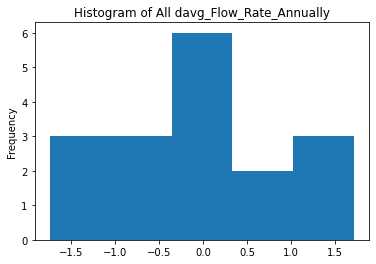

In [22]:
Q1data['davg_Flow_Rate_Annually'].plot(kind='hist',bins=5, title='Histogram of All davg_Flow_Rate_Annually',xlabel='flow rate')

In [23]:
kurtosis(Q1data['davg_Flow_Rate_Annually'])

-0.9828149741971735

## 4.3 Time series model of each year, to see the general behavior of the lake flow rate, to if if there is any unusual behavior (ex: drought), 

<AxesSubplot:title={'center':'Histogram of davg_Lake_Level'}, ylabel='Frequency'>

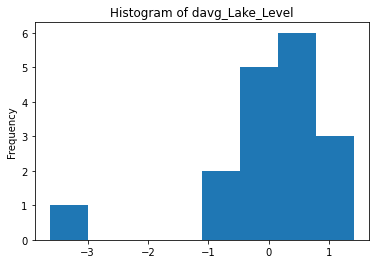

In [24]:
Q1data['davg_Lake_Level'].plot(kind='hist', bins=8, title='Histogram of davg_Lake_Level')

In [25]:
descriptive_stats(Q1data,'davg_Lake_Level')

Mean: 0.030666932017251222
Median: 0.2467743761730219
Q1: -0.4012530210870864
Q2: 0.2467743761730219
Q3: 0.6879250611044654
Q4: 1.4131853350770314
Inter-Quartile Range: 1.0891780821915518
Standard Deviation: 1.1123456891517194
Variance: 1.2373129321744134
Range: 5.037695785612755
-----------------------------------------


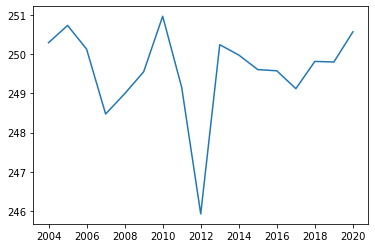

In [26]:
plt.plot(Q1data['time'],Q1data['avg_LakeL'])

## 4.4 Number of rainfall affects the flow rate or water level of the water body

<AxesSubplot:title={'center':'Histogram of sum_RF_Anually'}, ylabel='Frequency'>

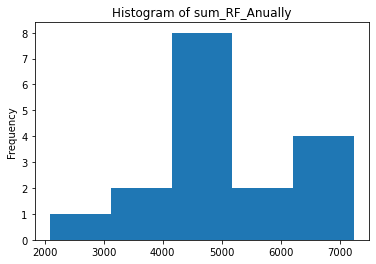

In [27]:
Q1data['sum_RF_Anually'].plot(kind='hist',bins=5, title='Histogram of sum_RF_Anually')

In [28]:
kurtosis(Q1data['sum_RF_Anually'])

0.30176191599124724

<AxesSubplot:title={'center':'ScatterPlot of davg_FlorRate vs Sum_RainFall'}, xlabel='sum_RF_Anually', ylabel='davg_Flow_Rate_Annually'>

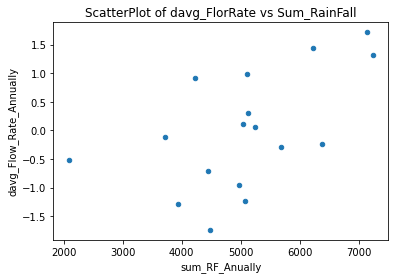

In [29]:
Q1data.plot.scatter(title='ScatterPlot of davg_FlorRate vs Sum_RainFall',x="sum_RF_Anually",y="davg_Flow_Rate_Annually")

<AxesSubplot:title={'center':'ScatterPlot of Lake_Level vs Sum_RainFall'}, xlabel='sum_RF_Anually', ylabel='davg_Lake_Level'>

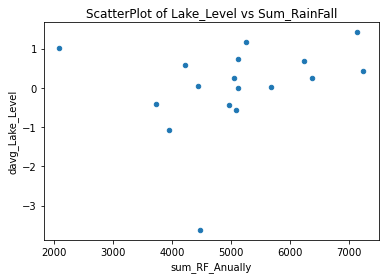

In [30]:
Q1data.plot.scatter(title='ScatterPlot of Lake_Level vs Sum_RainFall',x="sum_RF_Anually",y="davg_Lake_Level")